## Visualizing Tech Stocks

We will analyze and visualize the top 5 highest valued technology stocks, for a 5 year period, from July 2016- July 2021
* Microsoft (NASDAQ:MSFT)
* Amazon (NASDAQ:AMZN)
* Apple (NASDAQ:AAPL)
* Alphabet (NASDAQ:GOOG)
* Facebook (NASDAQ:FB).

Using Pandas, Pandas-Datarader, and Matplotlib, we will take a visual look into the similarities and differences between these stocks during this period. We will perform the following:
1. Visualize the stock prices using matplotlib
2. Calculate and visualize the daily simple rate of return 
3. Calculate and visualize the mean rates of return
4. Calculate and visualize the variances of the returns
5. Calculate and visualize the standard deviations of the returns
6. Write a short thesis based on the correlations between the tech stocks

### 1. Import Packages

In [6]:
import pandas as pd
import numpy as np

#### Step 2: Import Financial Package


In [8]:
import pandas_datareader as web

#### Step 3: Import Visualization Package


In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

### 2. Load the adjusted closings for the top 5 tech stocks.

In [15]:
symbols =["MSFT", "AMZN", "AAPL", "GOOG", "FB"]
start_date = "2016-07-15"
end_date = "2021-07-15"
stock_data = web.get_data_yahoo(symbols,start_date,end_date)
stock_data


Attributes   Adj Close                                                    \
Symbols           MSFT         AMZN        AAPL         GOOG          FB   
Date                                                                       
2016-07-15   49.471569   735.440002   23.069700   719.849976  116.860001   
2016-07-18   49.711090   736.070007   23.314920   733.780029  119.370003   
2016-07-19   48.909595   739.950012   23.324263   736.960022  120.610001   
2016-07-20   51.507542   745.719971   23.345284   741.190002  121.919998   
2016-07-21   51.406200   744.429993   23.221504   738.630005  120.610001   
...                ...          ...         ...          ...         ...   
2021-07-08  277.420013  3731.409912  143.240005  2583.540039  345.649994   
2021-07-09  277.940002  3719.340088  145.110001  2591.489990  350.420013   
2021-07-12  277.320007  3718.550049  144.500000  2611.280029  353.160004   
2021-07-13  280.980011  3677.360107  145.639999  2619.889893  352.089996   
2021-07-14  282.510010  3681.679932  149.149994  2641.649902  347.630005   

Attributes       Close                                                    ...  \
Symbols           MSFT         AMZN        AAPL         GOOG          FB  ...   
Date                                                                      ...   
2016-07-15   53.700001   735.440002   24.695000   719.849976  116.860001  ...   
2016-07-18   53.959999   736.070007   24.957500   733.780029  119.370003  ...   
2016-07-19   53.090000   739.950012   24.967501   736.960022  120.610001  ...   
2016-07-20   55.910000   745.719971   24.990000   741.190002  121.919998  ...   
2016-07-21   55.799999   744.429993   24.857500   738.630005  120.610001  ...   
...                ...          ...         ...          ...         ...  ...   
2021-07-08  277.420013  3731.409912  143.240005  2583.540039  345.649994  ...   
2021-07-09  277.940002  3719.340088  145.110001  2591.489990  350.420013  ...   
2021-07-12  277.320007  3718.550049  144.500000  2611.280029  353.160004  ...   
2021-07-13  280.980011  3677.360107  145.639999  2619.889893  352.089996  ...   
2021-07-14  282.510010  3681.679932  149.149994  2641.649902  347.630005  ...   

Attributes        Open                                                    \
Symbols           MSFT         AMZN        AAPL         GOOG          FB   
Date                                                                       
2016-07-15   53.950001   746.549988   24.730000   725.729980  117.739998   
2016-07-18   53.700001   735.489990   24.674999   722.710022  117.320000   
2016-07-19   53.709999   732.500000   24.889999   729.890015  118.989998   
2016-07-20   56.150002   744.000000   25.000000   737.330017  121.250000   
2016-07-21   55.980000   747.500000   24.957500   740.359985  121.919998   
...                ...          ...         ...          ...         ...   
2021-07-08  276.899994  3643.560059  141.580002  2565.000000  345.730011   
2021-07-09  275.720001  3722.520020  142.750000  2578.889893  345.320007   
2021-07-12  279.160004  3744.000000  146.210007  2596.669922  351.230011   
2021-07-13  277.519989  3702.100098  144.029999  2617.629883  351.500000   
2021-07-14  282.350006  3708.850098  148.100006  2638.030029  354.559998   

Attributes      Volume                                                 
Symbols           MSFT       AMZN         AAPL       GOOG          FB  
Date                                                                   
2016-07-15  32024400.0  3121400.0  120548000.0  1279300.0  16646000.0  
2016-07-18  31433900.0  2954900.0  145975600.0  1295500.0  20868400.0  
2016-07-19  53336500.0  2216800.0   95119600.0  1227500.0  21541300.0  
2016-07-20  89893300.0  2214000.0  105104000.0  1289700.0  20046500.0  
2016-07-21  32776700.0  2317100.0  130808000.0  1026300.0  17801700.0  
...                ...        ...          ...        ...         ...  
2021-07-08  24618600.0  5180600.0  105575500.0   989000.0  14406500.0  
2021-07-09  239

In [16]:
stock_data["Adj Close"]

Symbols,MSFT,AMZN,AAPL,GOOG,FB
Date,,,,,
2016-07-15,49.471569,735.440002,23.069700,719.849976,116.860001
2016-07-18,49.711090,736.070007,23.314920,733.780029,119.370003
2016-07-19,48.909595,739.950012,23.324263,736.960022,120.610001
2016-07-20,51.507542,745.719971,23.345284,741.190002,121.919998
2016-07-21,51.406200,744.429993,23.221504,738.630005,120.610001
...,...,...,...,...,...
2021-07-08,277.420013,3731.409912,143.240005,2583.540039,345.649994
2021-07-09,277.940002,3719.340088,145.110001,2591.489990,350.420013
2021-07-12,277.320007,3718.550049,144.500000,2611.280029,353.160004


### 3. Plot the adjusted closing prices over time.

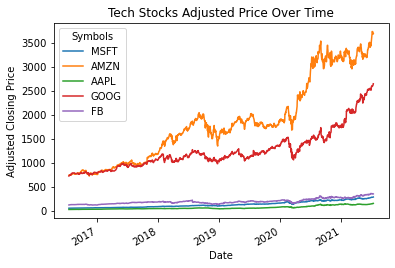

In [17]:
stock_data_closing_prices = stock_data['Adj Close']
stock_data_closing_prices.plot()
plt.xlabel("Date")
plt.ylabel("Adjusted Closing Price")
plt.title("Tech Stocks Adjusted Price Over Time")
plt.show()

### 4. Calculate and plot the daily simple rate of return over time.


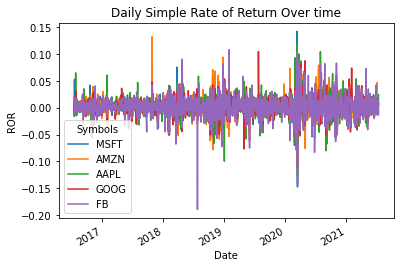

<Figure size 1152x648 with 0 Axes>

In [18]:
stock_data_daily_returns = stock_data['Adj Close'].pct_change()
stock_data_daily_returns.plot()
plt.xlabel("Date")
plt.ylabel("ROR")
plt.title("Daily Simple Rate of Return Over time")
plt.figure(figsize=(16,9))
plt.show()

### 5. Create subplots of daily simple rate of return.


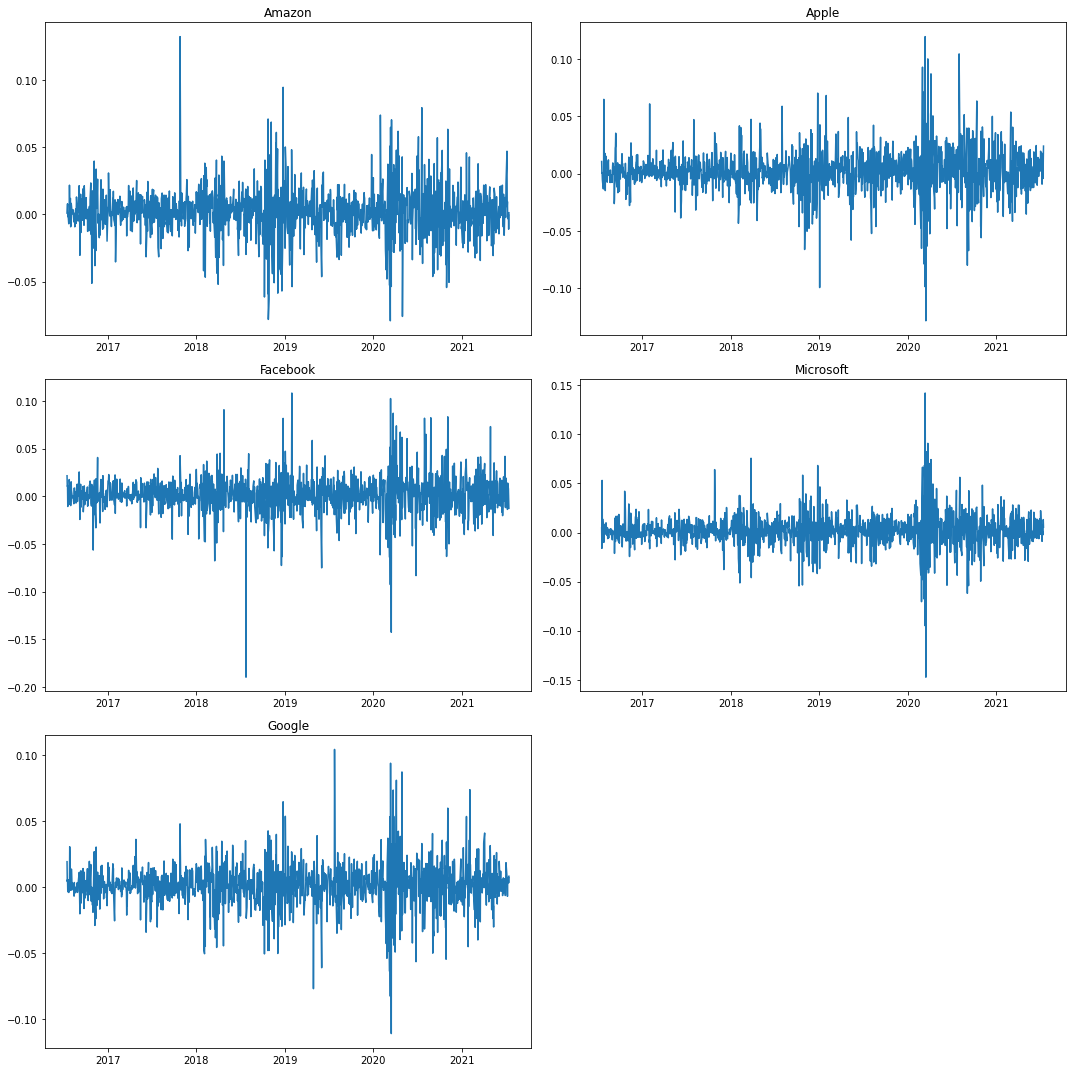

In [19]:
fig = plt.figure(figsize=(15,15))
ax1 = fig.add_subplot(321)
ax2 = fig.add_subplot(322)
ax3 = fig.add_subplot(323)
ax4 = fig.add_subplot(324)
ax5 = fig.add_subplot(325)
ax1.plot(stock_data['Adj Close']['AMZN'].pct_change())
ax1.set_title("Amazon")
ax2.plot(stock_data['Adj Close']['AAPL'].pct_change())
ax2.set_title("Apple")
ax3.plot(stock_data['Adj Close']['FB'].pct_change())
ax3.set_title("Facebook")
ax4.plot(stock_data['Adj Close']['MSFT'].pct_change())
ax4.set_title("Microsoft")
ax5.plot(stock_data['Adj Close']['GOOG'].pct_change())
ax5.set_title("Google")
plt.tight_layout()
plt.show()

### 6. Calculate and plot the mean of each tech stock's daily simple rate of return

In [20]:
# calculate daily mean
daily_mean = stock_data_daily_returns.mean()

daily_mean

Symbols
MSFT    0.001535
AMZN    0.001450
AAPL    0.001668
GOOG    0.001176
FB      0.001079
dtype: float64

In [21]:
daily_mean.keys()

Index(['MSFT', 'AMZN', 'AAPL', 'GOOG', 'FB'], dtype='object', name='Symbols')

In [22]:
# grab each daily mean value for the y axis
height = []
for key in daily_mean.keys():
    height.append(daily_mean[key])
height

[0.001535096911454679,
 0.001450264089728061,
 0.0016677453133668847,
 0.0011756735143233334,
 0.001079233237793429]

In [23]:
# arrange keys on x axis based on length
x_pos = np.arange(len(daily_mean.keys()))
x_pos

array([0, 1, 2, 3, 4])

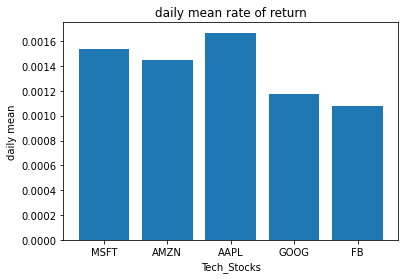

In [24]:
# plot bars
plt.bar(x_pos, height)
 
# create names on the x-axis
plt.xticks(x_pos, daily_mean.keys())

# label chart
plt.xlabel("Tech_Stocks")
plt.ylabel("daily mean")
plt.title("daily mean rate of return")

# show graphic
plt.show()

Apple has the highest daily mean rate of return. Facebook has the lowest.

### 7. Calculate and plot the variance.

In [25]:
# calculate variance
daily_var = stock_data_daily_returns.var()
daily_var

Symbols
MSFT    0.000296
AMZN    0.000338
AAPL    0.000364
GOOG    0.000282
FB      0.000419
dtype: float64

In [26]:
# variance index for the x axis
daily_var.keys()

Index(['MSFT', 'AMZN', 'AAPL', 'GOOG', 'FB'], dtype='object', name='Symbols')

In [27]:
# grab each variance value for the y axis
height = []
for key in daily_var.keys():
    height.append(daily_var[key])
height

[0.0002962089527908587,
 0.00033770013997295317,
 0.00036358384936091955,
 0.0002816476683254792,
 0.00041888254861884624]

In [28]:
# arrange keys on x axis based on length
x_pos = np.arange(len(daily_var.keys()))
x_pos

array([0, 1, 2, 3, 4])

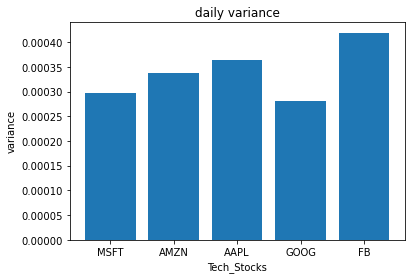

In [29]:
# plot bars
plt.bar(x_pos, height)
 
# create names on the x-axis
plt.xticks(x_pos, daily_var.keys())

# label chart
plt.xlabel("Tech_Stocks")
plt.ylabel("variance")
plt.title("daily variance")

# show graphic
plt.show()

Facebook shows the highest variance of all the stocks, indicating it can be a riskier investment. Google shows the lowest variance, indicating that the returns are more predictable. This goes along with the typical understanding of higher return, high risks stocks, and lower return, low risk stocks.

### 8. Calculate and plot the standard deviation

In [30]:
# calculate standard deviation
daily_std = stock_data_daily_returns.std()
daily_std

Symbols
MSFT    0.017211
AMZN    0.018377
AAPL    0.019068
GOOG    0.016782
FB      0.020467
dtype: float64

In [31]:
# standard deviation index for the x axis
daily_var.keys()

Index(['MSFT', 'AMZN', 'AAPL', 'GOOG', 'FB'], dtype='object', name='Symbols')

In [32]:
# grab each standard deviation value for the y axis
height = []
for key in daily_std.keys():
    height.append(daily_std[key])
height

[0.017210722029910853,
 0.018376619383688425,
 0.019067874799277438,
 0.016782361822028483,
 0.020466620351656653]

In [33]:
# arrange keys on x axis based on length
x_pos = np.arange(len(daily_std.keys()))
x_pos

array([0, 1, 2, 3, 4])

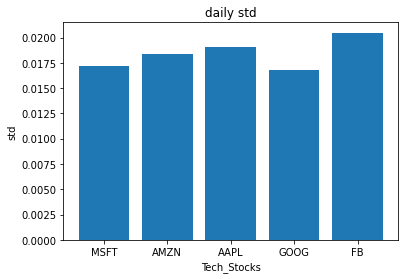

In [34]:
# plot bars
plt.bar(x_pos, height)
 
# create names on the x-axis
plt.xticks(x_pos, daily_std.keys())

# label chart
plt.xlabel("Tech_Stocks")
plt.ylabel("std")
plt.title("daily std")

# show graphic
plt.show()

Facebook is the most volatile stock, as it has the largest standard deviation. Google, on the other hand, is the least volatile stock, but has the lowest mean return.

### 9. Calculate the correlations


In [35]:
stock_data_daily_returns.corr()

Symbols,MSFT,AMZN,AAPL,GOOG,FB
Symbols,,,,,
MSFT,1.000000,0.711910,0.726139,0.772797,0.637398
AMZN,0.711910,1.000000,0.630397,0.671422,0.623910
AAPL,0.726139,0.630397,1.000000,0.658514,0.606584
GOOG,0.772797,0.671422,0.658514,1.000000,0.691531
FB,0.637398,0.623910,0.606584,0.691531,1.000000


None of the stocks are negatively correlated. Microsoft and Google are highly correlated, while Facebook and Apple exhibit the lowest correlation.